# Required python packages

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from xgboost import XGBClassifier, plot_importance
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay, classification_report, roc_auc_score, roc_curve
from sklearn.model_selection import train_test_split, GridSearchCV
import pickle

pd.set_option('display.max_columns', None)

# Initial data import

In [2]:
df0 = pd.read_csv('HR_capstone_dataset.csv')
df0.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


# Exploratory Data Analysis (EDA)

In [3]:
df0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   Department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


$\textbf{Inference} : $ There are 14999 rows. Each row is a data for a customer in Salifort Motors. There are total 10 columns, out of whihc two are float type, six are integer types and two are object type. 

In [4]:
df0.describe(include='all')

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999,14999
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10,3
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,sales,low
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4140,7316
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268,NaN,NaN
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281,NaN,NaN
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000,NaN,NaN
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000,NaN,NaN
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000,NaN,NaN
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000,NaN,NaN


$\textbf{Inference} : $ The above descriptive statistics give a high level overview of the data distribution. Out of three types of salaray: High, Medium and Low, the number of customer is more in Low salary range. This might be useful later as a strong point of customer turnover. Apart from that, the maximum customer reported in this dataset work in Sales department

In [5]:
df0 = df0.rename(columns={
    'Work_accident' : 'work_accident',
    'average_montly_hours' : 'average_monthly_hours',
    'time_spend_company' : 'tenure',
    'Department' : 'department'
})
df0.head()

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,tenure,work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


$\textbf{Inference} : $ Renaming of few columns are done to make the feature names consistent

In [6]:
df0.isna().sum()

satisfaction_level       0
last_evaluation          0
number_project           0
average_monthly_hours    0
tenure                   0
work_accident            0
left                     0
promotion_last_5years    0
department               0
salary                   0
dtype: int64

$\textbf{Inference} : $ There is no missing values

In [7]:
df0.duplicated().sum()

3008

In [8]:
print("Duplicate entries : " + str(round((df0.duplicated().sum()/df0.shape[0])*100,1)) + " %")

Duplicate entries : 20.1 %


$\textbf{Inference} : $ There are 3008 duplicate customers rows out of 14999 row which is 20%. This may happen due to bootstrapping the customer data from a large dataset. We can drop the duplicates keeping the original row only

In [9]:
df1 = df0.drop_duplicates(keep='first')

$\textbf{Inference} : $ There are no duplicate entries now.

In [10]:
df1.head()

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,tenure,work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


# Check for outliers

#### Checking and handling outliers are important as they can bias the model outcome.

<Axes: title={'center': 'Detection of outliers in tenure'}, xlabel='Customer Tenure (years)'>

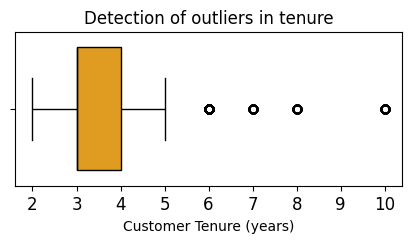

In [11]:
plt.figure(figsize=(5,2))
plt.title('Detection of outliers in tenure', fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.xlabel("Customer Tenure (years)")
sns.boxplot(x='tenure', data=df1, color='orange', linecolor='black')

$\textbf{Inference} : $ There are outliers. However, majority of the customer have tenuers of 3-4 years. Excluding outliers, minimum tenure is 2 years and maximum tenure is 5 years. Few models are sensitive to outliers where few are not. Accordingly the outliers will be handled later on.

In [12]:
df1['left'].value_counts(normalize=True)

left
0    0.833959
1    0.166041
Name: proportion, dtype: float64

$\textbf{Inference} : $ The outcome classes are not well balanced

# Guiding visuals

<Axes: title={'center': 'Project overview'}, xlabel='Number of projects done', ylabel='Count'>

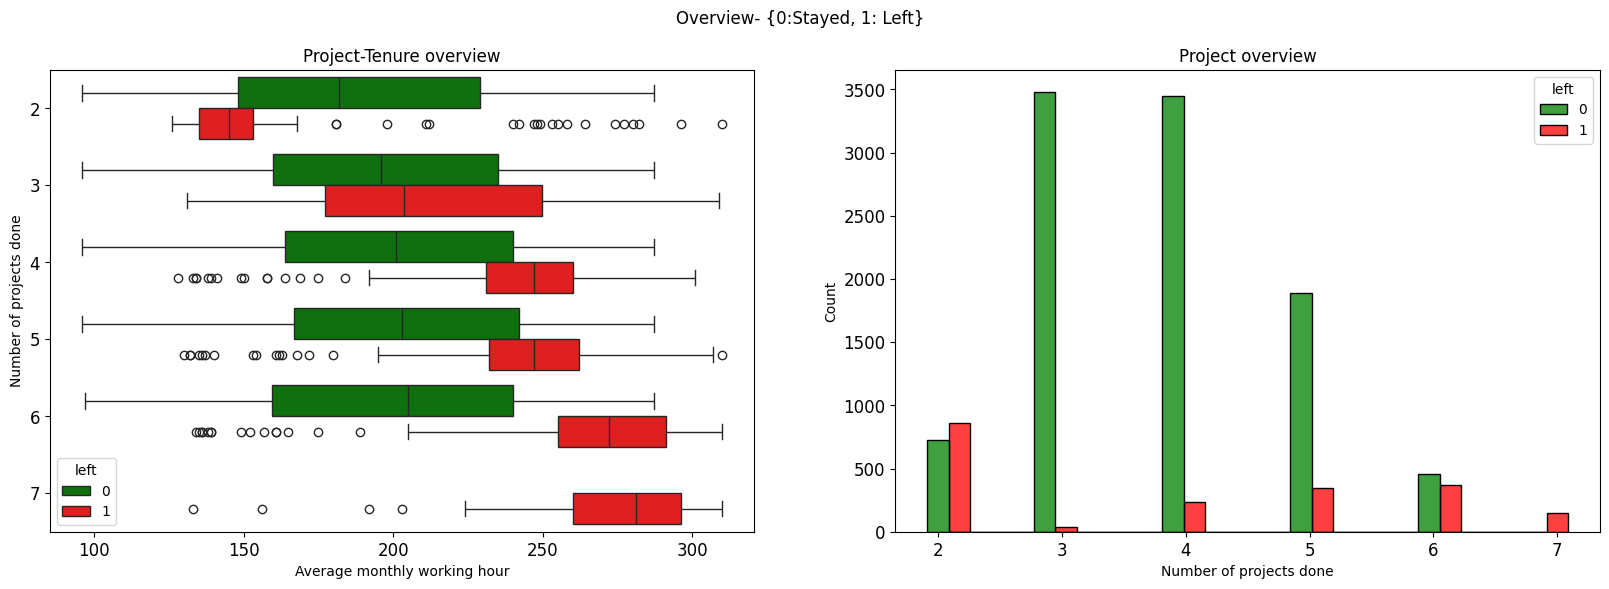

In [13]:
plt.figure(figsize=(20,6))
plt.suptitle("Overview- {0:Stayed, 1: Left}")
plt.subplot(1,2,1)
plt.title('Project-Tenure overview', fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.xlabel("Average monthly working hour")
plt.ylabel("Number of projects done")
sns.boxplot(x='average_monthly_hours', y = 'number_project', data=df1, hue='left', orient='h', palette={1 : 'red', 0 : 'green'})

plt.subplot(1,2,2)
plt.title('Project overview', fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.xlabel("Number of projects done")
sns.histplot(x='number_project', data=df1, stat='count', hue='left', multiple='dodge', shrink=2, palette={1 : 'red', 0 : 'green'})

$\textbf{Inference} : $ More number of project completion takes more monthly hours. So, the trend in figure left has a righward movement.

$\textbf{Inference} : $ Two types of turnover is possible here. Number 1: some customer work less as compared to their peers with the same number of project as they are probaliby fired by the company. This case is strongly evident for say proejcts volume 2 indicating less box size for turnover customer than the stayed customer. Number 2: Those who wrork 6 or 7 projects left the company, maybe because of their heavy workload indicating by average monthly working hour exceeding 250hrs/month which is significantly high. Eventually, people with 7 projects all left the comapny.

$\textbf{Inference} : $ Optimal number of project the company must assign to customer ranges 3-4 throughout the majority of his/her tenure

In [14]:
df1['average_monthly_hours'].mean()

200.4735218080227

$\textbf{Inference} : $ If an employee works for 5 days a week from Monday to Friday, each day 8 hours, so in a month, the working our is 160 hours. But the average working hour the company shows is around 200 hours. This means that the workload is very high in current situation. This may be a reason for turnover

<Axes: title={'center': 'Workload vs customer satisfaction (0:Stayded, 1:Left)'}, xlabel='Average monthly working hour', ylabel='Customer satisfaction'>

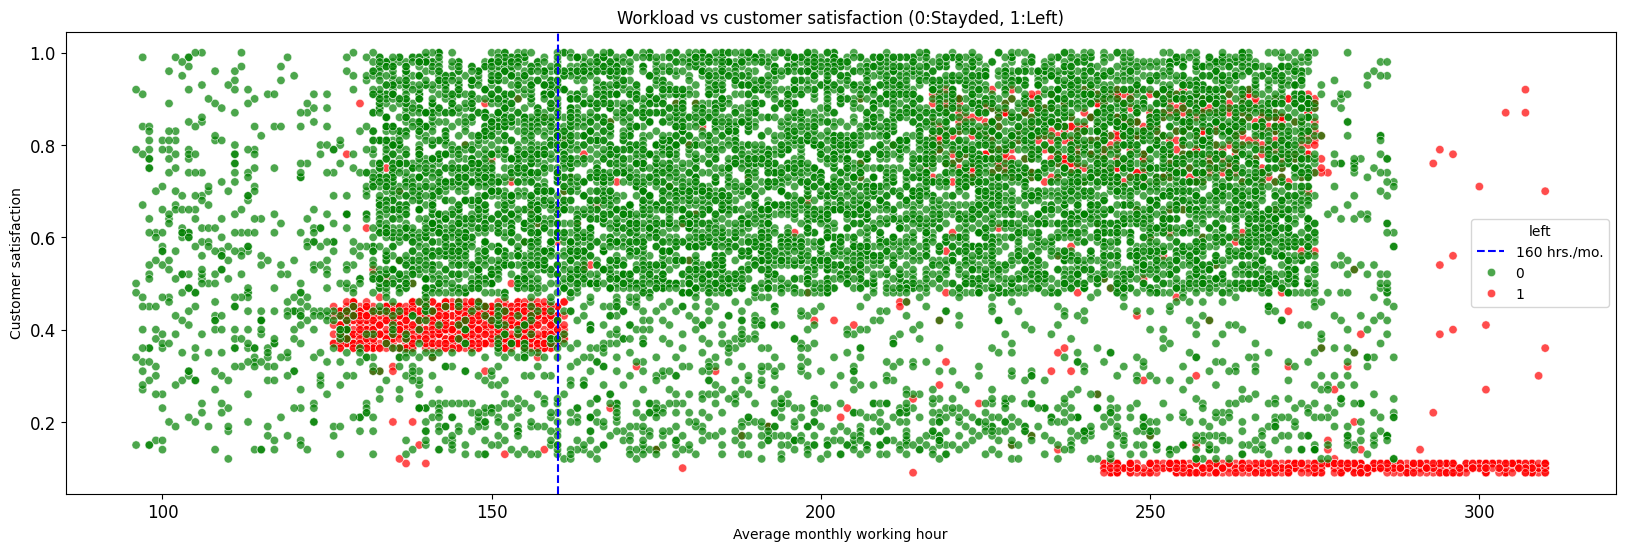

In [15]:
plt.figure(figsize=(20,6))
plt.title('Workload vs customer satisfaction (0:Stayded, 1:Left)', fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.xlabel("Average monthly working hour")
plt.ylabel("Customer satisfaction")
plt.axvline(x=160, color='blue', label='160 hrs./mo.', ls='--')
sns.scatterplot(x='average_monthly_hours', y ='satisfaction_level', data = df1, hue='left', palette={0:'green', 1:'red'}, alpha=0.7)

$\textbf{Inference} : $ The two turnover groups are evident in the above scatteplot. The over-working group has customer satisfaction close to zero and they left. The other group has satisfaction score around 0.4 which is mediam, but they are possibly fired due to less wrok

<Axes: title={'center': 'Tenure overview'}, xlabel='Customer tenure (year)', ylabel='Count'>

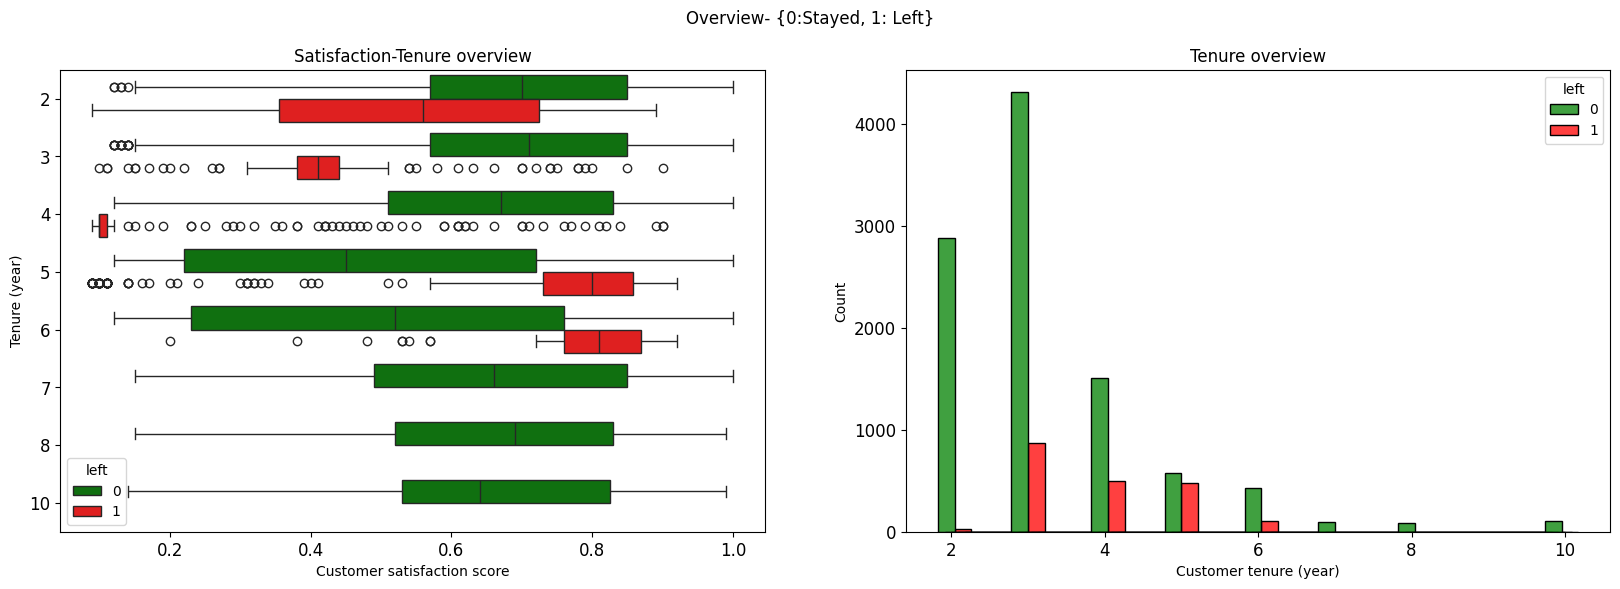

In [16]:
plt.figure(figsize=(20,6))
plt.suptitle("Overview- {0:Stayed, 1: Left}")
plt.subplot(1,2,1)
plt.title('Satisfaction-Tenure overview', fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.xlabel("Customer satisfaction score")
plt.ylabel("Tenure (year)")
sns.boxplot(x='satisfaction_level', y = 'tenure', data=df1, hue='left', orient='h', palette={1 : 'red', 0 : 'green'})

plt.subplot(1,2,2)
plt.title('Tenure overview', fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.xlabel("Customer tenure (year)")
sns.histplot(x='tenure', data=df1, stat='count', hue='left', multiple='dodge', shrink=5, palette={1 : 'red', 0 : 'green'})

$\textbf{Inference} : $ Employees who left fall into two general categories: dissatisfied employees with shorter tenures and very satisfied employees with medium-length tenures.

$\textbf{Inference} : $ Four-year employees who left seem to have an unusually low satisfaction level. It's worth investigating changes to company policy that might have affected people specifically at the four-year mark, if possible. 

$\textbf{Inference} : $ The longest-tenured employees didn't leave. Their satisfaction levels aligned with those of newer employees who stayed. 

$\textbf{Inference} : $ The histogram shows that there are relatively few longer-tenured employees. It's possible that they're the higher-ranking, higher-paid employees.

In [17]:
df1.groupby(['left'])['satisfaction_level'].agg(['mean', 'median'])

,mean,median
left,,
0,0.667365,0.69
1,0.440271,0.41


$\textbf{Inference} : $ Naturally, satisfaction score is less who left

<Axes: title={'center': 'Salary-Tenure (long-term) overview'}, xlabel='Tenure', ylabel='Count'>

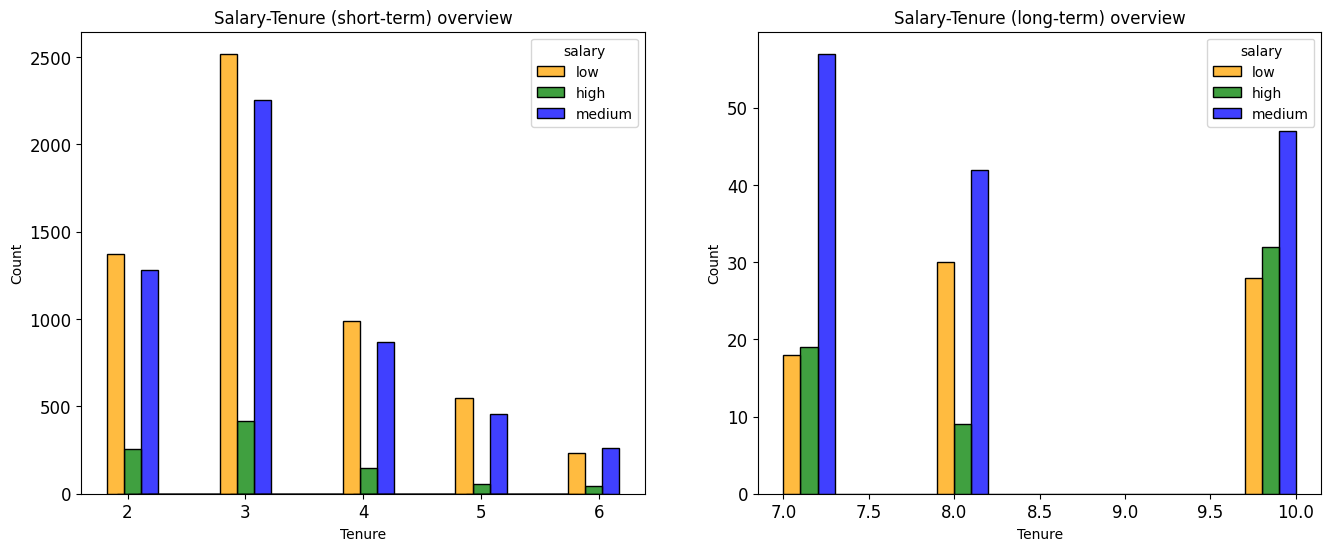

In [18]:
plt.figure(figsize=(16,6))
plt.subplot(1,2,1)
plt.title('Salary-Tenure (short-term) overview', fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.xlabel("Tenure")
sns.histplot(x='tenure', stat='count', data=df1[df1['tenure']<7], hue='salary', multiple='dodge', shrink=5, 
             palette={'high' : 'green', 'medium' : 'blue', 'low' : 'orange'}, hue_order={'low', 'medium', 'high'})

plt.subplot(1,2,2)
plt.title('Salary-Tenure (long-term) overview', fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.xlabel("Tenure")
sns.histplot(x='tenure', stat='count', data=df1[df1['tenure']>6], hue='salary', multiple='dodge', shrink=1, 
             palette={'high' : 'green', 'medium' : 'blue', 'low' : 'orange'}, hue_order={'low', 'medium', 'high'})

$\textbf{Inference} : $ Number of high-paid customers are less and they are more aligned with high tenure

<Axes: title={'center': 'Workload vs companys last evaluation (0:Stayded, 1:Left)'}, xlabel='Average monthly working hour', ylabel='Companys last evaluation'>

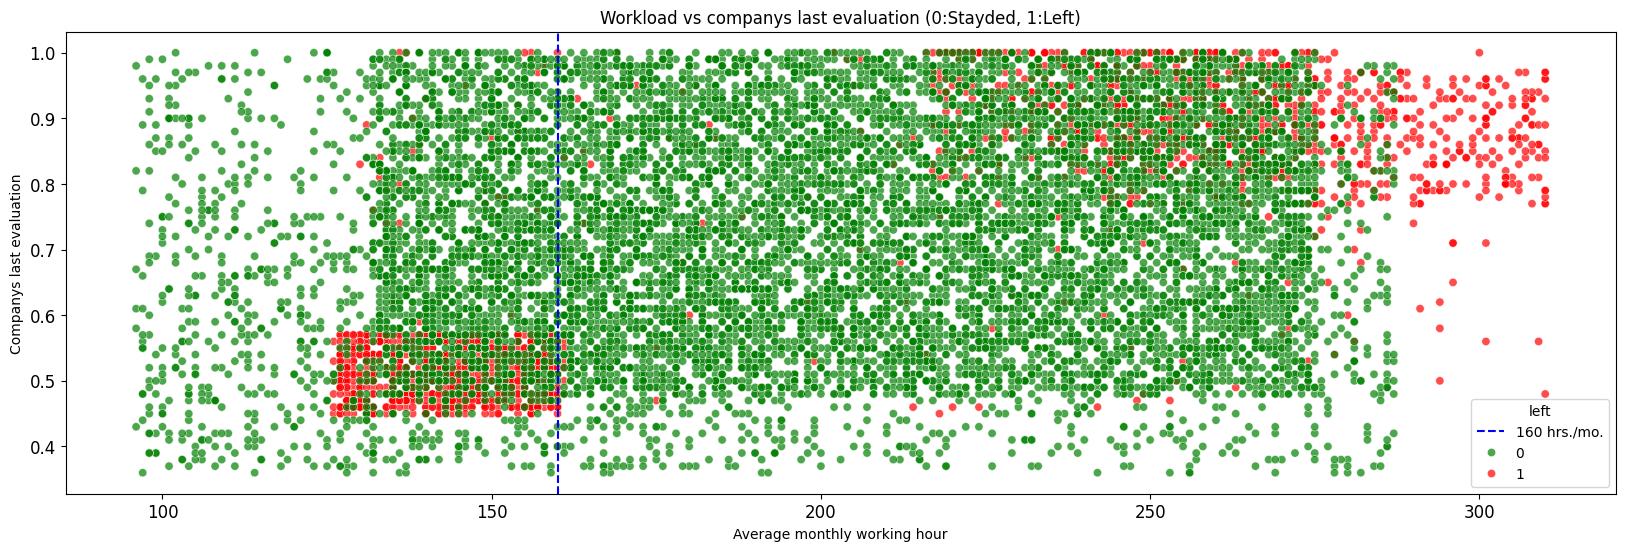

In [19]:
plt.figure(figsize=(20,6))
plt.title('Workload vs companys last evaluation (0:Stayded, 1:Left)', fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.xlabel("Average monthly working hour")
plt.ylabel("Companys last evaluation")
plt.axvline(x=160, color='blue', label='160 hrs./mo.', ls='--')
sns.scatterplot(x='average_monthly_hours', y ='last_evaluation', data = df1, hue='left', palette={0:'green', 1:'red'}, alpha=0.7)

$\textbf{Inference} : $ The scatterplot indicates two groups of employees who left: overworked employees who performed very well and employees who worked slightly under the nominal monthly average of 160 hours with lower evaluation scores. 

$\textbf{Inference} : $ There seems to be a correlation between hours worked and evaluation score. 

<Axes: title={'center': 'Workload vs companys promotion (0:Stayded, 1:Left)'}, xlabel='Average monthly working hour', ylabel='Whether promoted in last 5 years: 1-yes, 0-no'>

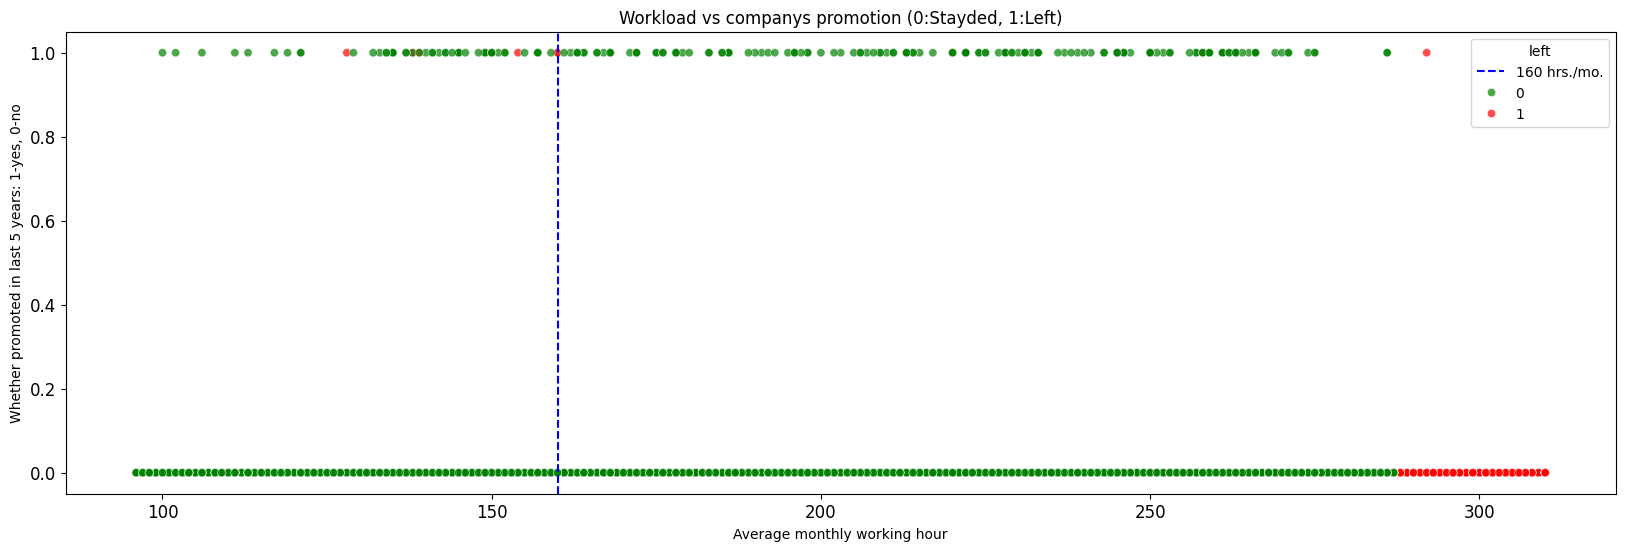

In [20]:
plt.figure(figsize=(20,6))
plt.title('Workload vs companys promotion (0:Stayded, 1:Left)', fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.xlabel("Average monthly working hour")
plt.ylabel("Whether promoted in last 5 years: 1-yes, 0-no")
plt.axvline(x=160, color='blue', label='160 hrs./mo.', ls='--')
sns.scatterplot(x='average_monthly_hours', y ='promotion_last_5years', data = df1, hue='left', palette={0:'green', 1:'red'}, alpha=0.7)

$\textbf{Inference} : $ very few employees who were promoted in the last five years left

$\textbf{Inference} : $ very few employees who worked the most hours were promoted

$\textbf{Inference} : $ almost all of the employees who left were working the longest hours 

In [21]:
df1['department'].value_counts()

department
sales          3239
technical      2244
support        1821
IT              976
RandD           694
product_mng     686
marketing       673
accounting      621
hr              601
management      436
Name: count, dtype: int64

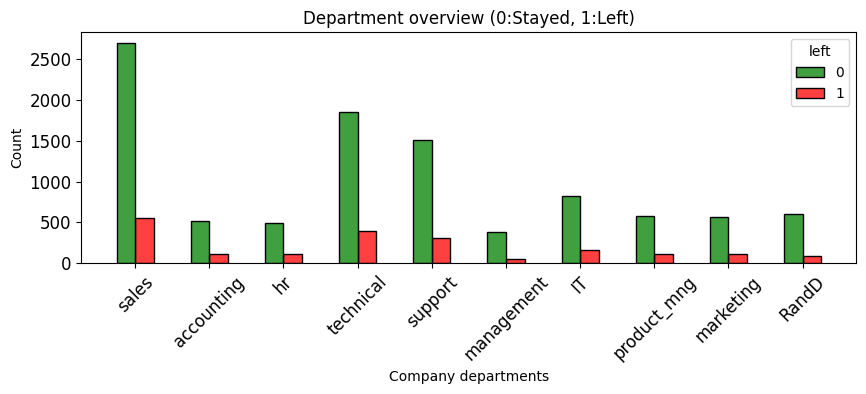

In [22]:
plt.figure(figsize=(10,3))
plt.title('Department overview (0:Stayed, 1:Left)', fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.xlabel("Company departments")
sns.histplot(x='department', data=df1, stat='count', hue='left', multiple='dodge', shrink=0.5, palette={1 : 'red', 0 : 'green'})
plt.xticks(rotation=45);

$\textbf{Inference} : $ There doesn't seem to be any department that differs significantly in its proportion of employees who left to those who stayed. 

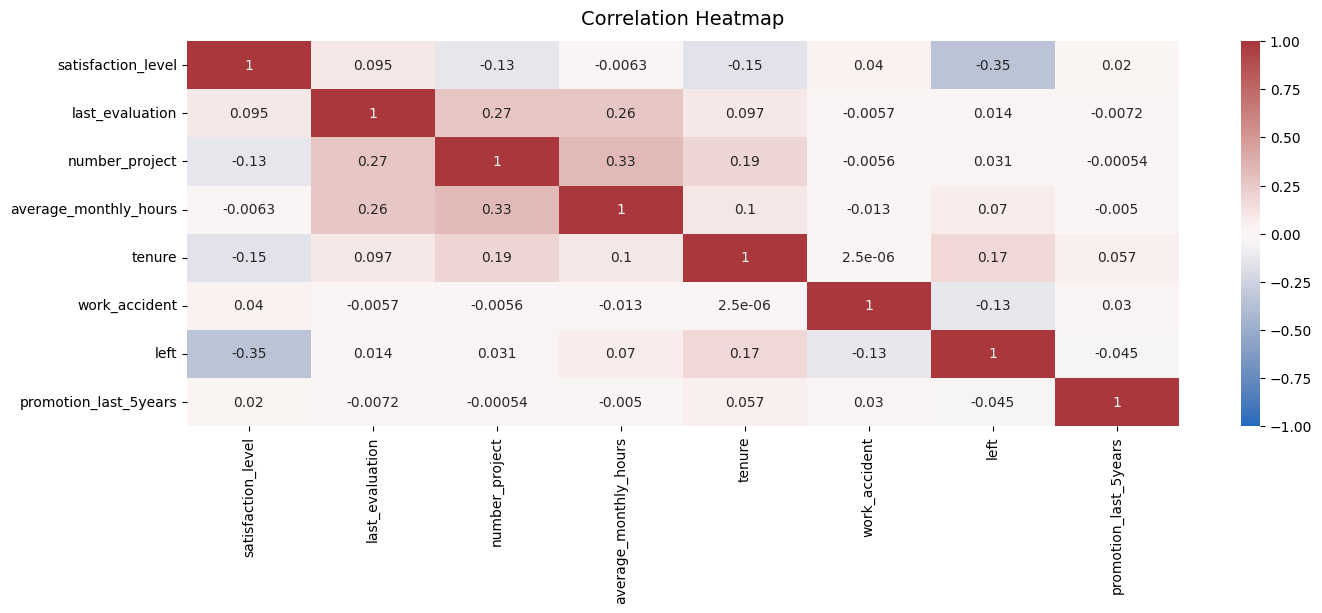

In [23]:
plt.figure(figsize=(16, 5))
heatmap = sns.heatmap(df1.corr(numeric_only=True), vmin=-1, vmax=1, annot=True, cmap=sns.color_palette("vlag", as_cmap=True))
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':14}, pad=12);

$\textbf{Inference} : $ The correlation heatmap confirms that the number of projects, monthly hours, and evaluation scores all have some positive correlation with each other, and whether an employee leaves is negatively correlated with their satisfaction level.

### $\textbf{EDA insights:}$ It appears that employees are leaving the company as a result of poor management. Leaving is tied to longer working hours, many projects, and generally lower satisfaction levels. It can be ungratifying to work long hours and not receive promotions or good evaluation scores. There's a sizeable group of employees at this company who are probably burned out. It also appears that if an employee has spent more than six years at the company, they tend not to leave.


# Some regression analysis

In [24]:
df1.head()

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,tenure,work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


$\textbf{Inference} : $ There are two object types features viz salary and department. The feeature department has values which does not follow any order, so we can dummy encode. On the other hand, salary values are ordinal and requies numbering in particular order.

In [25]:
df_enc = df1.copy()
df_enc['salary'] = (
    df_enc['salary'].astype('category').cat.set_categories(['low', 'medium', 'high']).cat.codes
    )
df_enc = pd.get_dummies(df_enc, drop_first=False)
df_enc.head()

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,tenure,work_accident,left,promotion_last_5years,salary,department_IT,department_RandD,department_accounting,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical
0,0.38,0.53,2,157,3,0,1,0,0,False,False,False,False,False,False,False,True,False,False
1,0.80,0.86,5,262,6,0,1,0,1,False,False,False,False,False,False,False,True,False,False
2,0.11,0.88,7,272,4,0,1,0,1,False,False,False,False,False,False,False,True,False,False
3,0.72,0.87,5,223,5,0,1,0,0,False,False,False,False,False,False,False,True,False,False
4,0.37,0.52,2,159,3,0,1,0,0,False,False,False,False,False,False,False,True,False,False


$\textbf{Inference} : $ All features are numeric now

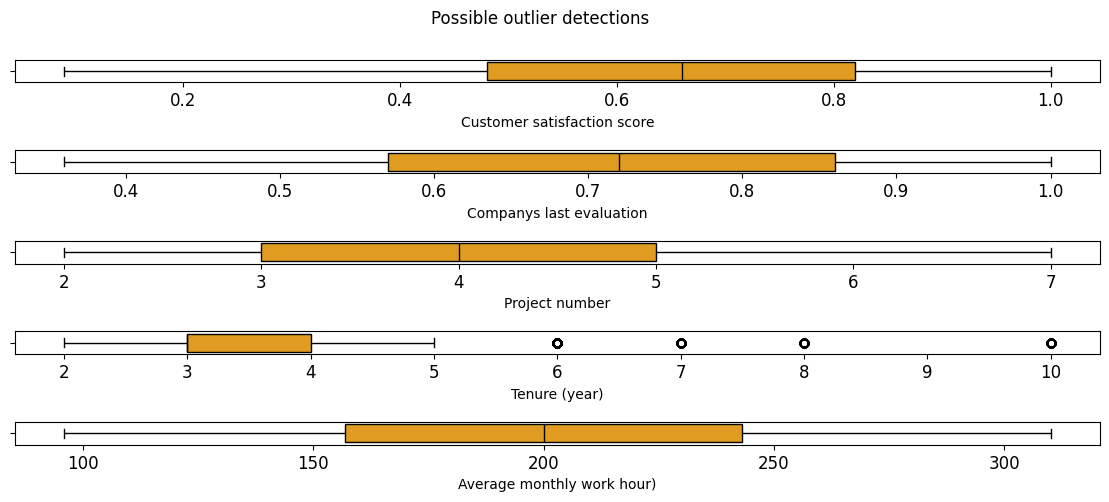

In [26]:
plt.figure(figsize=(14,5))
plt.suptitle('Possible outlier detections')

plt.subplot(5,1,1)
plt.xticks(fontsize=12)
plt.xlabel("Customer satisfaction score")
sns.boxplot(x='satisfaction_level', data=df1, color='orange', linecolor='black')

plt.subplot(5,1,2)
plt.xticks(fontsize=12)
plt.xlabel("Companys last evaluation")
sns.boxplot(x='last_evaluation', data=df1, color='orange', linecolor='black')

plt.subplot(5,1,3)
plt.xticks(fontsize=12)
plt.xlabel("Project number")
sns.boxplot(x='number_project', data=df1, color='orange', linecolor='black')

plt.subplot(5,1,4)
plt.xticks(fontsize=12)
plt.xlabel("Tenure (year)")
sns.boxplot(x='tenure', data=df1, color='orange', linecolor='black')

plt.subplot(5,1,5)
plt.xticks(fontsize=12)
plt.xlabel("Average monthly work hour)")
sns.boxplot(x='average_monthly_hours', data=df1, color='orange', linecolor='black')

plt.subplots_adjust(hspace=3)


$\textbf{Inference} : $ Only the tenure column has outliers in higher data spectrum. We will remove them before performing regression as the regression model is sensitive to outliers. For machine learning models like random forest or xgboost, outliers can be taken

In [27]:
percentile25 = df_enc['tenure'].quantile(0.25)
percentile75 = df_enc['tenure'].quantile(0.75)
iqr = percentile75 - percentile25
upper_limit = percentile75 + (1.5*iqr)
lower_limit = percentile25 - (1.5*iqr)

df_logreg = df_enc[(df_enc['tenure']>=lower_limit)|(df_enc['tenure']<=upper_limit)]

$\textbf{Inference} : $ df_logreg will be used for logistic regression for detection of "left" labels

In [28]:
y = df_logreg['left']
X = df_logreg.drop('left', axis = 1)

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.25, random_state=42)

$\textbf{Inference} : $ data are split for logistic regression

# Logistic regression

In [30]:
log_clf = LogisticRegression(random_state=42, max_iter=500).fit(X_train, y_train)
y_pred = log_clf.predict(X_test)

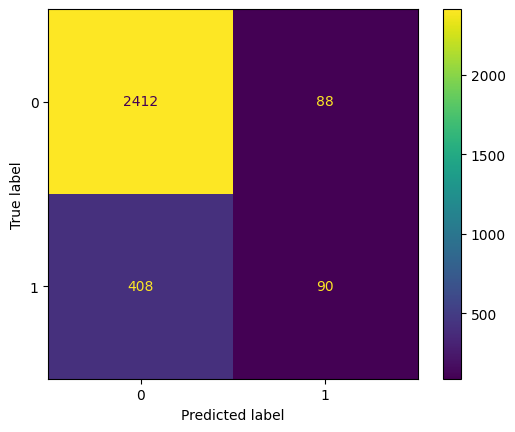

In [31]:
log_cm = confusion_matrix(y_test, y_pred, labels=log_clf.classes_)
log_disp = ConfusionMatrixDisplay(confusion_matrix=log_cm, display_labels=log_clf.classes_).plot()

In [32]:
y_test.value_counts()

left
0    2500
1     498
Name: count, dtype: int64

$\textbf{Inference} : $ Upper-left: True negative, out of 2500 stayed customes, the logistic regression model could predict 2412 stayed customer faithfully.

$\textbf{Inference} : $ Lower-right: True positive, out of 498 turnover customes, the logistic regression model could predict only 90 turnover customer faithfully.

$\textbf{Inference} : $ Upper-right: False positive, out of 2998 customers in test dataset, the logistic regression model labeled 88 customers as turnover customer who are actually stayed customer

$\textbf{Inference} : $ Lower-left: False negative, out of 2998 customers in test dataset, the logistic regression model labeled 408 customers as stayed customer who are actually turnover customer

In [33]:
target_names = ['Predicted would not leave', 'Predicted would leave']
print(classification_report(y_test, y_pred, target_names=target_names))

                           precision    recall  f1-score   support

Predicted would not leave       0.86      0.96      0.91      2500
    Predicted would leave       0.51      0.18      0.27       498

                 accuracy                           0.83      2998
                macro avg       0.68      0.57      0.59      2998
             weighted avg       0.80      0.83      0.80      2998



$\textbf{Inference} : $ The classification report above shows that the logistic regression model achieved a precision of 80%, recall of 83%, f1-score of 80% (all weighted averages). However, if it's most important to predict employees who leave, then the scores are significantly lower.

# ML: Decision tree

#### We can keep the outliers and use df_enc only

In [34]:
y = df_enc['left']
X = df_enc.drop('left', axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, stratify=y, random_state=0)

In [35]:
tree = DecisionTreeClassifier(random_state=0)

cv_params = {
    'max_depth' : [4,6,8,None],
    'min_samples_leaf' : [1,2,5],
    'min_samples_split' : [2,4,6]
}

scoring = {
    'accuracy' : 'accuracy',
    'precision' : 'precision',
    'recall' : 'recall',
    'f1' : 'f1',
    'roc_auc' : 'roc_auc'
}

tree1 = GridSearchCV(tree, cv_params, scoring=scoring, cv=4, refit='roc_auc') #roc_auc is the refit key. As roc_auc increases, true positive rate increases
%time tree1.fit(X_train, y_train)

CPU times: total: 3.06 s
Wall time: 3.12 s


GridSearchCV(cv=4, estimator=DecisionTreeClassifier(random_state=0),
             param_grid={'max_depth': [4, 6, 8, None],
                         'min_samples_leaf': [1, 2, 5],
                         'min_samples_split': [2, 4, 6]},
             refit='roc_auc',
             scoring={'accuracy': 'accuracy', 'f1': 'f1',
                      'precision': 'precision', 'recall': 'recall',
                      'roc_auc': 'roc_auc'})

In [36]:
print(tree1.best_estimator_)
print(tree1.best_score_)

DecisionTreeClassifier(max_depth=4, min_samples_leaf=5, random_state=0)
0.969819392792457


$\textbf{Inference} : $ This is a strong AUC score 0.97, which shows that this model can predict employees who will leave very well.

# ML: Random forest

In [37]:
rf = RandomForestClassifier(random_state=0)

cv_params = {'max_depth': [3,5, None], 
             'max_features': [1.0],
             'max_samples': [0.7, 1.0],
             'min_samples_leaf': [1,2,3],
             'min_samples_split': [2,3,4],
             'n_estimators': [300, 500],
             } 

rf1 = GridSearchCV(rf, cv_params, scoring=scoring, cv=4, refit='roc_auc')

# %time rf1.fit(X_train, y_train)

In [38]:
# with open('D:/Interview/Coursera_Projects/Customer_churn_Google_Capstone_GADA/rf1.pickle', 'wb') as to_write:
#     pickle.dump(rf1, to_write)

In [39]:
# print(rf1.best_estimator_)
# print(rf1.best_score_)

$\textbf{Inference} : $ random forest outperformes the single decision tree with roc_auc score 0.98

In [40]:
with open('D:/Interview/Coursera_Projects/Customer_churn_Google_Capstone_GADA/rf1.pickle', 'rb') as to_read:
    rf1 = pickle.load(to_read)

## We will use Random forest model for predictions

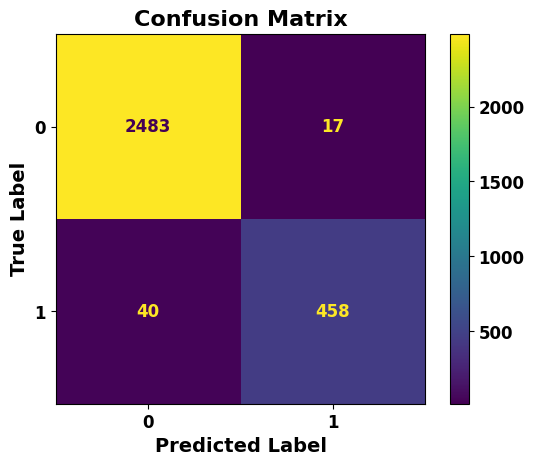

In [51]:
preds = rf1.best_estimator_.predict(X_test)
cm = confusion_matrix(y_test, preds, labels=rf1.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=rf1.classes_)

# Plot the confusion matrix
disp.plot(values_format='')

# Customize the font size and make text bold
plt.rc('font', size=12, weight='bold')  # You can change the size to your preference
plt.xticks(fontsize=12, fontweight='bold')  # Customizing x-axis tick labels
plt.yticks(fontsize=12, fontweight='bold')  # Customizing y-axis tick labels

# Customize axis labels if you want
plt.xlabel('Predicted Label', fontsize=14, fontweight='bold')
plt.ylabel('True Label', fontsize=14, fontweight='bold')
plt.title('Confusion Matrix', fontsize=16, fontweight='bold')
plt.savefig('retention_confusion.png', dpi=500)
# Show the plot
plt.show()

$\textbf{Inference} : $ The random forest model is overall well performing as compared to logistic regression or single dicision tree. It has less number of false labels with 0.98 roc_auc score

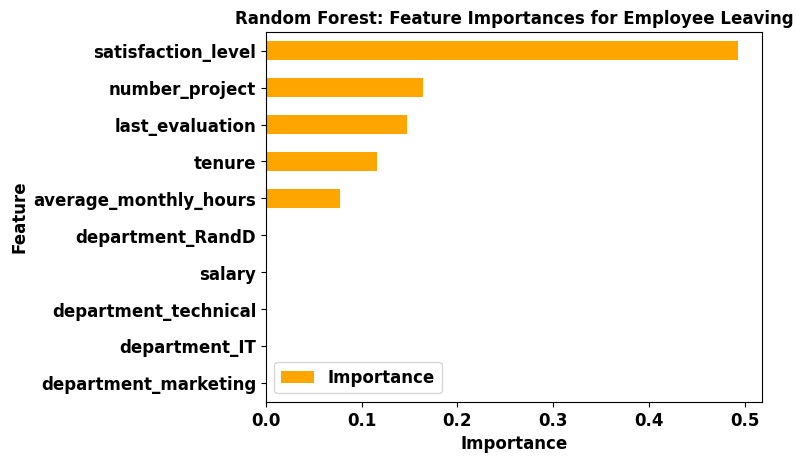

In [50]:
feat_impt = rf1.best_estimator_.feature_importances_
# Get indices of top 10 features
ind = np.argpartition(rf1.best_estimator_.feature_importances_, -10)[-10:]
# Get column labels of top 10 features 
feat = X.columns[ind]
# Filter `feat_impt` to consist of top 10 feature importances
feat_impt = feat_impt[ind]
y_df = pd.DataFrame({"Feature":feat,"Importance":feat_impt})
y_sort_df = y_df.sort_values("Importance")
fig = plt.figure()
ax1 = fig.add_subplot(111)
y_sort_df.plot(kind='barh',ax=ax1,x="Feature",y="Importance", color = 'orange')
ax1.set_title("Random Forest: Feature Importances for Employee Leaving", fontsize=12, fontweight='bold')
ax1.set_ylabel("Feature", fontweight='bold')
ax1.set_xlabel("Importance", fontweight='bold')
#plt.savefig('feature_imp.png', dpi=500)
plt.show()

$\textbf{Inference} : $ The plot above shows that in this random forest model, last_evaluation, number_project, tenure, and satisfaction_level have the highest importance. These variables are most helpful in predicting the outcome variable, left, and they are the same as the ones used by the decision tree model.

# Recommendations


#### Cap the number of projects that employees can work on.
#### Consider promoting employees who have been with the company for atleast four years, or conduct further investigation about why four-year tenured employees are so dissatisfied.
#### Either reward employees for working longer hours, or don't require them to do so.
#### High evaluation scores should not be reserved for employees who work 200+ hours per month. Consider a proportionate scale for rewarding employees who contribute more/put in more effort.
